# 5. Logistic Regression

## 1. Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run #0-LoadingData.ipynb
%run functions/functions.ipynb

Pandas_ML_Project_SNR_Minus10
Pandas_ML_Project_SNR_Minus15
Pandas_ML_Project_SNR_Minus20
Pandas_ML_Project_SNR_Minus25
Pandas_ML_Project_SNR_Minus5
Data loaded
Example: X, y = data['Pandas_ML_Project_SNR_Minus5']['x'], data['Pandas_ML_Project_SNR_Minus5']['y']
Loaded: 
 - partition(X, y, percent_train = 0.8), 
 - Xy_dataloader(X_numpy, y_numpy, batch_size=32)


<hr>

## 2. Model

In [3]:
class LogisticRegression():
    
    def __init__(self):
        pass
    
    def sigmoid(self,z):   
        return 1 / (1 + np.exp(-z))

    def h(self,X, theta):
        return self.sigmoid(X @ theta)

    def grad_j(self,X, y, y_pred):
        gradj = X.T @ (y - y_pred) / X.shape[0]
        return gradj

    def j(self, theta, X, y):    
        y_pred = self.h(X, theta)
        error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
        cost = sum(error) / X.shape[0]
        grad = self.grad_j(X, y, y_pred)
        return cost[0], grad
    
    def train(self, X, y, alpha, num_iters, theta_initial):
        m, n = X.shape
        X = np.insert(X, 0, 1, axis=1)
        y = y.reshape(m, 1)
        
        self.theta = theta_initial
        
        self.j_history = []
        for i in range(num_iters):
            
            cost, grad = self.j(self.theta, X, y)
            self.theta = self.theta + alpha * grad
            self.j_history.append(cost)
            
            if i % 1000 == 0:
                print(f"Iteration {i}. Loss: {cost}")
            
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        self.y_pred = self.h(X, self.theta)
        self.y_pred = np.round(self.y_pred.reshape(-1,), 0).astype(int)
        return self.y_pred
    
    def get_accuracy(self, X, y):
        acc = (np.sum(self.y_pred == y) / len(y)) * 100
        return acc
    
    def plot(self):
        plt.plot(self.j_history)
        plt.xlabel("Iteration")
        plt.ylabel("$J(\theta)$")
        plt.title("Training cost over time with batch gradient descent NORMALIZED")
        plt.show()
        

In [4]:
#selecting SNR-5
X, y = data["Pandas_ML_Project_SNR_Minus5"]['x'], data["Pandas_ML_Project_SNR_Minus5"]['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)

(8000, 11) (8000,) (2000, 11) (2000,)


<hr>

## 3. Train

In [6]:
# Train for 1000000 iterations on full training set
m, n = X.shape
alpha = .0005
num_iters = 10000
theta_initial = np.zeros((n+1, 1))

In [7]:
LRModel = LogisticRegression()
LRModel.train(X_train, y_train, alpha, num_iters, theta_initial)

print("Theta optimized:", LRModel.theta)
print("Cost with optimized theta:", LRModel.j_history[-1])

Iteration 0. Loss: 0.6931471805600389
Iteration 1000. Loss: 0.6632924307772857
Iteration 2000. Loss: 0.6382685218686495
Iteration 3000. Loss: 0.6159358439057683
Iteration 4000. Loss: 0.5953313259575067
Iteration 5000. Loss: 0.5760062556371726
Iteration 6000. Loss: 0.5577367641315398
Iteration 7000. Loss: 0.5403981662926559
Iteration 8000. Loss: 0.5239103509063994
Iteration 9000. Loss: 0.5082139599520183
Theta optimized: [[-0.24658456]
 [ 0.55417959]
 [-0.12830238]
 [-0.12289955]
 [ 0.48626631]
 [ 0.49720425]
 [ 0.13182935]
 [ 0.16397664]
 [-0.12983288]
 [-0.13471796]
 [-0.03794897]
 [-0.0325705 ]]
Cost with optimized theta: 0.4932745501298352


## 4. Predict

Training set accuracy: 100.0
Testing set accuracy: 100.0


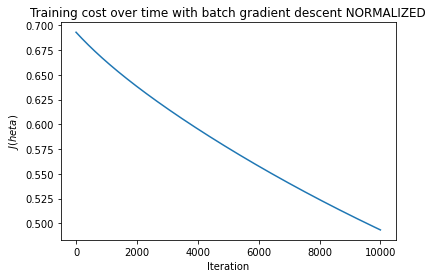

In [8]:
y_pred = LRModel.predict(X_train)
print("Training set accuracy:", LRModel.get_accuracy(X_train, y_train))

y_pred = LRModel.predict(X_test)
print("Testing set accuracy:", LRModel.get_accuracy(X_test, y_test))

LRModel.plot()

## 5. Training and predicting on all SNR

### SNR-10

(8000, 11) (8000,) (2000, 11) (2000,)
Iteration 0. Loss: 0.6931471805600389
Iteration 1000. Loss: 0.6811326869939145
Iteration 2000. Loss: 0.6709806147034985
Iteration 3000. Loss: 0.6617434871063146
Iteration 4000. Loss: 0.653008339318946
Iteration 5000. Loss: 0.6445936846728008
Iteration 6000. Loss: 0.6364183206892412
Iteration 7000. Loss: 0.6284445898306007
Iteration 8000. Loss: 0.6206537984440182
Iteration 9000. Loss: 0.6130355446149296
Theta optimized: [[-0.15426065]
 [ 0.41293937]
 [-0.08236117]
 [-0.07475714]
 [ 0.31664441]
 [ 0.30842883]
 [ 0.04168197]
 [ 0.05271771]
 [-0.07432196]
 [-0.08261241]
 [-0.04434264]
 [-0.05216218]]
Cost with optimized theta: 0.6055904479745393
Training set accuracy: 78.4
Testing set accuracy: 77.45


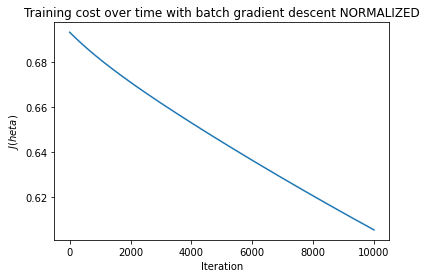

In [9]:
X, y = data["Pandas_ML_Project_SNR_Minus10"]['x'], data["Pandas_ML_Project_SNR_Minus10"]['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
LRModel = LogisticRegression()
LRModel.train(X_train, y_train, alpha, num_iters, theta_initial)

print("Theta optimized:", LRModel.theta)
print("Cost with optimized theta:", LRModel.j_history[-1])

y_pred = LRModel.predict(X_train)
print("Training set accuracy:", LRModel.get_accuracy(X_train, y_train))

y_pred = LRModel.predict(X_test)
print("Testing set accuracy:", LRModel.get_accuracy(X_test, y_test))

LRModel.plot()

### SNR-15

(8000, 11) (8000,) (2000, 11) (2000,)
Iteration 0. Loss: 0.6931471805600389
Iteration 1000. Loss: 0.6909084609657273
Iteration 2000. Loss: 0.6889812107712239
Iteration 3000. Loss: 0.687201687952303
Iteration 4000. Loss: 0.6854964356358958
Iteration 5000. Loss: 0.6838324534551972
Iteration 6000. Loss: 0.6821948714657357
Iteration 7000. Loss: 0.6805769479365302
Iteration 8000. Loss: 0.6789755867344193
Iteration 9000. Loss: 0.6773893275297874
Theta optimized: [[-0.0572852 ]
 [ 0.19336307]
 [-0.03117296]
 [-0.03032339]
 [ 0.14042731]
 [ 0.13544674]
 [ 0.01291769]
 [ 0.01626072]
 [-0.03180036]
 [-0.02302418]
 [-0.03157342]
 [-0.02264729]]
Cost with optimized theta: 0.6758190092201115
Training set accuracy: 57.025000000000006
Testing set accuracy: 55.300000000000004


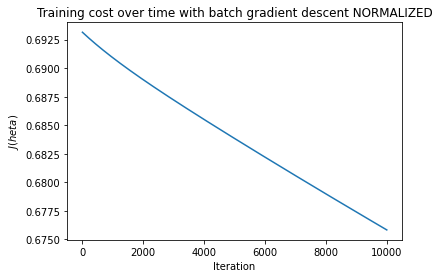

In [13]:
X, y = data["Pandas_ML_Project_SNR_Minus15"]['x'], data["Pandas_ML_Project_SNR_Minus15"]['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
LRModel = LogisticRegression()
LRModel.train(X_train, y_train, alpha, num_iters, theta_initial)

print("Theta optimized:", LRModel.theta)
print("Cost with optimized theta:", LRModel.j_history[-1])

y_pred = LRModel.predict(X_train)
print("Training set accuracy:", LRModel.get_accuracy(X_train, y_train))

y_pred = LRModel.predict(X_test)
print("Testing set accuracy:", LRModel.get_accuracy(X_test, y_test))

LRModel.plot()

### SNR-20

(8000, 11) (8000,) (2000, 11) (2000,)
Iteration 0. Loss: 0.6931471805600389
Iteration 1000. Loss: 0.6928055211355274
Iteration 2000. Loss: 0.6925212828133879
Iteration 3000. Loss: 0.6922638028151176
Iteration 4000. Loss: 0.6920193179827798
Iteration 5000. Loss: 0.6917816461860263
Iteration 6000. Loss: 0.6915480061863876
Iteration 7000. Loss: 0.691317142541987
Iteration 8000. Loss: 0.6910884844322702
Iteration 9000. Loss: 0.6908617682721032
Theta optimized: [[-0.01993378]
 [ 0.07725786]
 [-0.01322864]
 [-0.01159987]
 [ 0.04469618]
 [ 0.05430746]
 [ 0.0031988 ]
 [ 0.00228089]
 [-0.01374715]
 [-0.0085126 ]
 [-0.01029319]
 [-0.00840284]]
Cost with optimized theta: 0.6906370924055912
Training set accuracy: 52.287499999999994
Testing set accuracy: 50.64999999999999


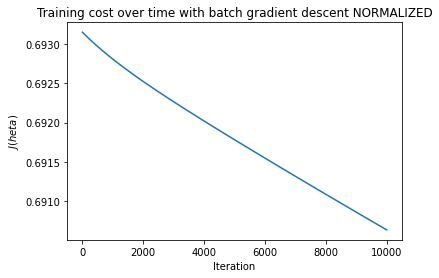

In [11]:
X, y = data["Pandas_ML_Project_SNR_Minus20"]['x'], data["Pandas_ML_Project_SNR_Minus20"]['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
LRModel = LogisticRegression()
LRModel.train(X_train, y_train, alpha, num_iters, theta_initial)

print("Theta optimized:", LRModel.theta)
print("Cost with optimized theta:", LRModel.j_history[-1])

y_pred = LRModel.predict(X_train)
print("Training set accuracy:", LRModel.get_accuracy(X_train, y_train))

y_pred = LRModel.predict(X_test)
print("Testing set accuracy:", LRModel.get_accuracy(X_test, y_test))

LRModel.plot()

### SNR-25

(8000, 11) (8000,) (2000, 11) (2000,)
Iteration 0. Loss: 0.6931471805600389
Iteration 1000. Loss: 0.693106282314797
Iteration 2000. Loss: 0.6930783933571387
Iteration 3000. Loss: 0.693056103129874
Iteration 4000. Loss: 0.693036263846841
Iteration 5000. Loss: 0.6930175381003679
Iteration 6000. Loss: 0.6929993573513764
Iteration 7000. Loss: 0.6929814796078401
Iteration 8000. Loss: 0.6929638015705104
Iteration 9000. Loss: 0.6929462788493961
Theta optimized: [[-0.0030879 ]
 [ 0.02281004]
 [-0.00236718]
 [ 0.00033196]
 [ 0.01396328]
 [ 0.01381391]
 [-0.00409417]
 [-0.00144284]
 [-0.00063428]
 [-0.00149499]
 [-0.00612591]
 [ 0.00220639]]
Cost with optimized theta: 0.6929289094007145
Training set accuracy: 50.349999999999994
Testing set accuracy: 49.0


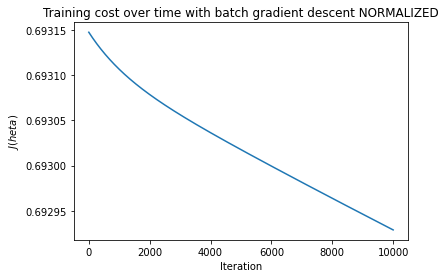

In [14]:
X, y = data["Pandas_ML_Project_SNR_Minus25"]['x'], data["Pandas_ML_Project_SNR_Minus25"]['y']
idx, X_train, y_train, X_test, y_test = partition(X, y, percent_train=0.8)
LRModel = LogisticRegression()
LRModel.train(X_train, y_train, alpha, num_iters, theta_initial)

print("Theta optimized:", LRModel.theta)
print("Cost with optimized theta:", LRModel.j_history[-1])

y_pred = LRModel.predict(X_train)
print("Training set accuracy:", LRModel.get_accuracy(X_train, y_train))

y_pred = LRModel.predict(X_test)
print("Testing set accuracy:", LRModel.get_accuracy(X_test, y_test))

LRModel.plot()

# 5. Logistic Regression using Sklearn

In [21]:
from sklearn.metrics import average_precision_score
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))

=========Average precision score=======
0.5116392698183567


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report

model = LogisticRegression()

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))

print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.5116392698183567
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.56      0.50      0.53      1022
           1       0.53      0.59      0.56       978

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.526292 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.525583 (0.017041) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.526042 (0.016671) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.525625 (0.016897) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.526250 (0.016141) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.525958 (0.016175) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.526250 (0.016121) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.525500 (0.016013) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.525375 (0.016008) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.525458 (0.015467) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.524667 (0.015492) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.524750 (0.015426) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.523875 (0.016369) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.526167 (0.015639) with: 